    1. Use the iris database to answer the following quesitons:

    a. What does the distribution of petal lengths look like?
    b. Is there a correlation between petal length and petal width?
    c. Would it be reasonable to predict species based on sepal width and sepal length?
    d. Which features would be best used to predict species?


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

from pydataset import data

In [2]:
iris = sns.load_dataset('iris')

In [3]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


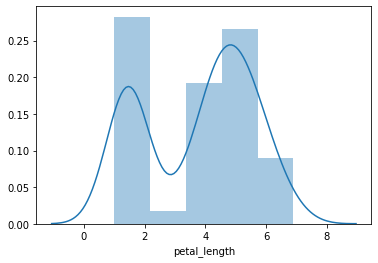

In [4]:
sns.distplot(iris.petal_length)

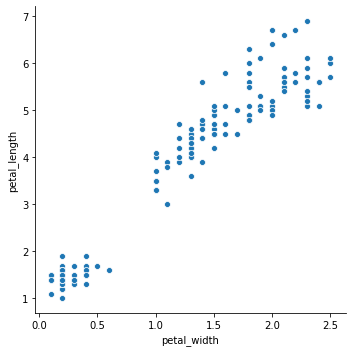

In [5]:
sns.relplot(data=iris, y='petal_length', x='petal_width')

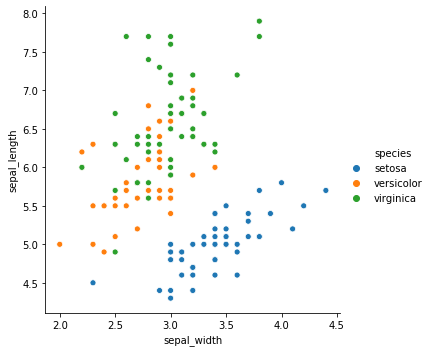

In [6]:
sns.relplot(data=iris, y='sepal_length', x='sepal_width', hue="species")

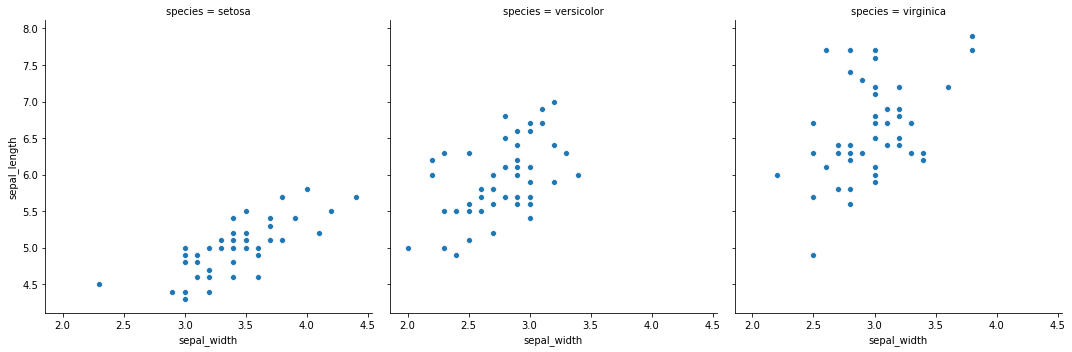

In [7]:
sns.relplot(data=iris, y='sepal_length', x='sepal_width', col="species")

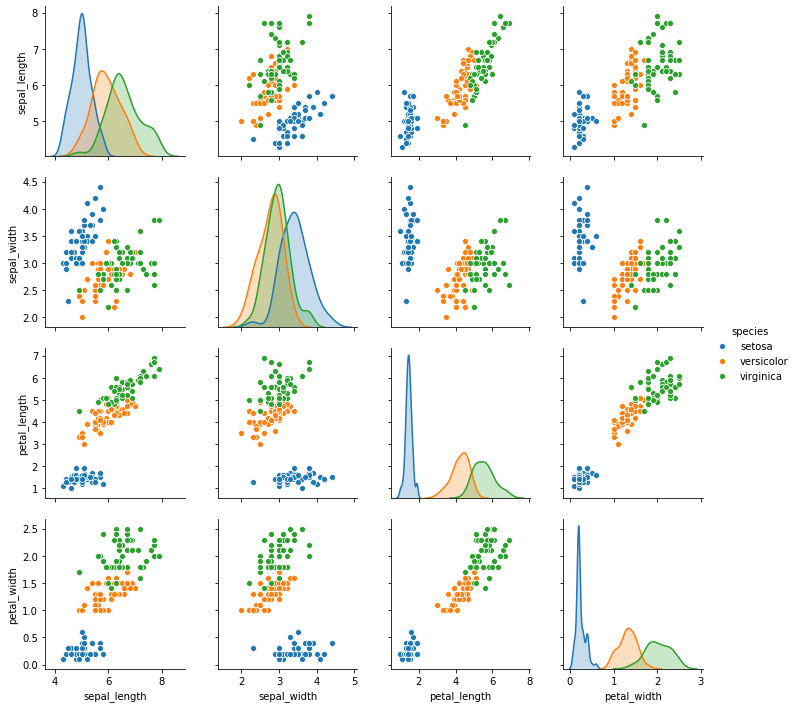

In [8]:
sns.pairplot(iris, hue="species")

    1.Using the lesson as an example, use seaborn's load_dataset function to load the anscombe data set. Use pandas to group the data by the dataset column, and calculate summary statistics for each dataset. What do you notice?

    Plot the x and y values from the anscombe data. Each dataset should be in a separate column.

In [9]:
anscombe = sns.load_dataset('anscombe')

In [10]:
anscombe.head()

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


In [11]:
anscombe.groupby('dataset').describe()

x                                               y            \
        count mean       std  min  25%  50%   75%   max count      mean   
dataset                                                                   
I        11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
II       11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
III      11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500000   
IV       11.0  9.0  3.316625  8.0  8.0  8.0   8.0  19.0  11.0  7.500909   

                                                   
              std   min    25%   50%   75%    max  
dataset                                            
I        2.031568  4.26  6.315  7.58  8.57  10.84  
II       2.031657  3.10  6.695  8.14  8.95   9.26  
III      2.030424  5.39  6.250  7.11  7.98  12.74  
IV       2.030579  5.25  6.170  7.04  8.19  12.50

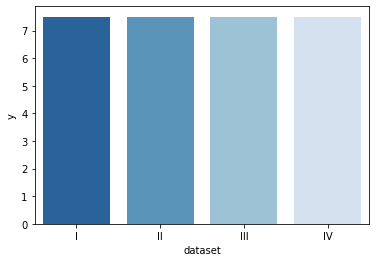

In [12]:
palette = "Blues_r"
palette1 = 'Purples'
sns.barplot(data=anscombe, y='y', x='dataset', ci=None, palette=palette)


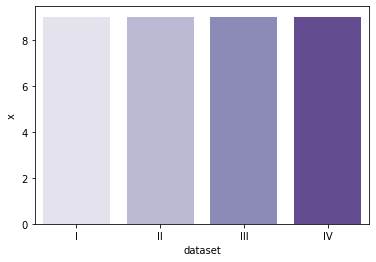

In [13]:
sns.barplot(data=anscombe, y='x', x='dataset', ci=None, palette=palette1)

    2. Load the InsectSprays dataset and read it's documentation. Create a boxplot that shows the effectiveness of the different insect sprays.

In [14]:
insepct_sprays = data('InsectSprays')

In [15]:
insepct_sprays.head()

,count,spray
1,10,A
2,7,A
3,20,A
4,14,A
5,14,A


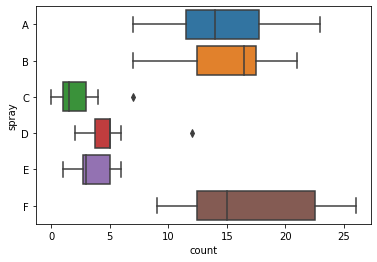

In [16]:
sns.boxplot(data=insepct_sprays, x="count", y="spray")

    3. Load the swiss dataset and read it's documentation. Create visualizations to answer the following questions:

    -Create an attribute named is_catholic that holds a boolean value of whether or not the province is Catholic. (Choose a cutoff point for what constitutes catholic)
    -Does whether or not a province is Catholic influence fertility?
    -What measure correlates most strongly with fertility?

In [17]:
swiss = data('swiss')

In [18]:
swiss.sample(10)

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality
Gruyere,82.4,53.3,12,7,97.67,21.0
Rolle,60.5,60.8,16,10,7.72,16.3
ValdeTravers,67.6,18.7,25,7,8.65,19.5
Paysd'enhaut,72.0,63.5,6,3,2.56,18.0
Orbe,57.4,54.1,20,6,4.20,15.3
Payerne,74.2,58.1,14,8,5.23,23.8
Franches-Mnt,92.5,39.7,5,5,93.40,20.2
Cossonay,61.7,69.3,22,5,2.82,18.7
St Maurice,65.0,75.9,9,9,99.06,17.8
Porrentruy,76.1,35.3,9,7,90.57,26.6


In [19]:
is_catholic = swiss.Catholic >= 75

In [20]:
swiss.Catholic[is_catholic]

Delemont         84.84
Franches-Mnt     93.40
Porrentruy       90.57
Broye            92.85
Glane            97.16
Gruyere          97.67
Sarine           91.38
Veveyse          98.61
Conthey          99.71
Entremont        99.68
Herens          100.00
Martigwy         98.96
Monthey          98.22
St Maurice       99.06
Sierre           99.46
Sion             96.83
Name: Catholic, dtype: float64

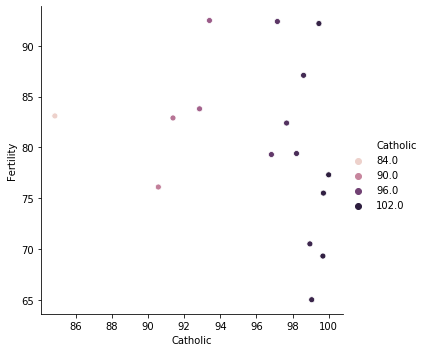

In [24]:
sns.relplot(data=swiss, y='Fertility', x="Catholic", hue=swiss.Catholic[is_catholic])

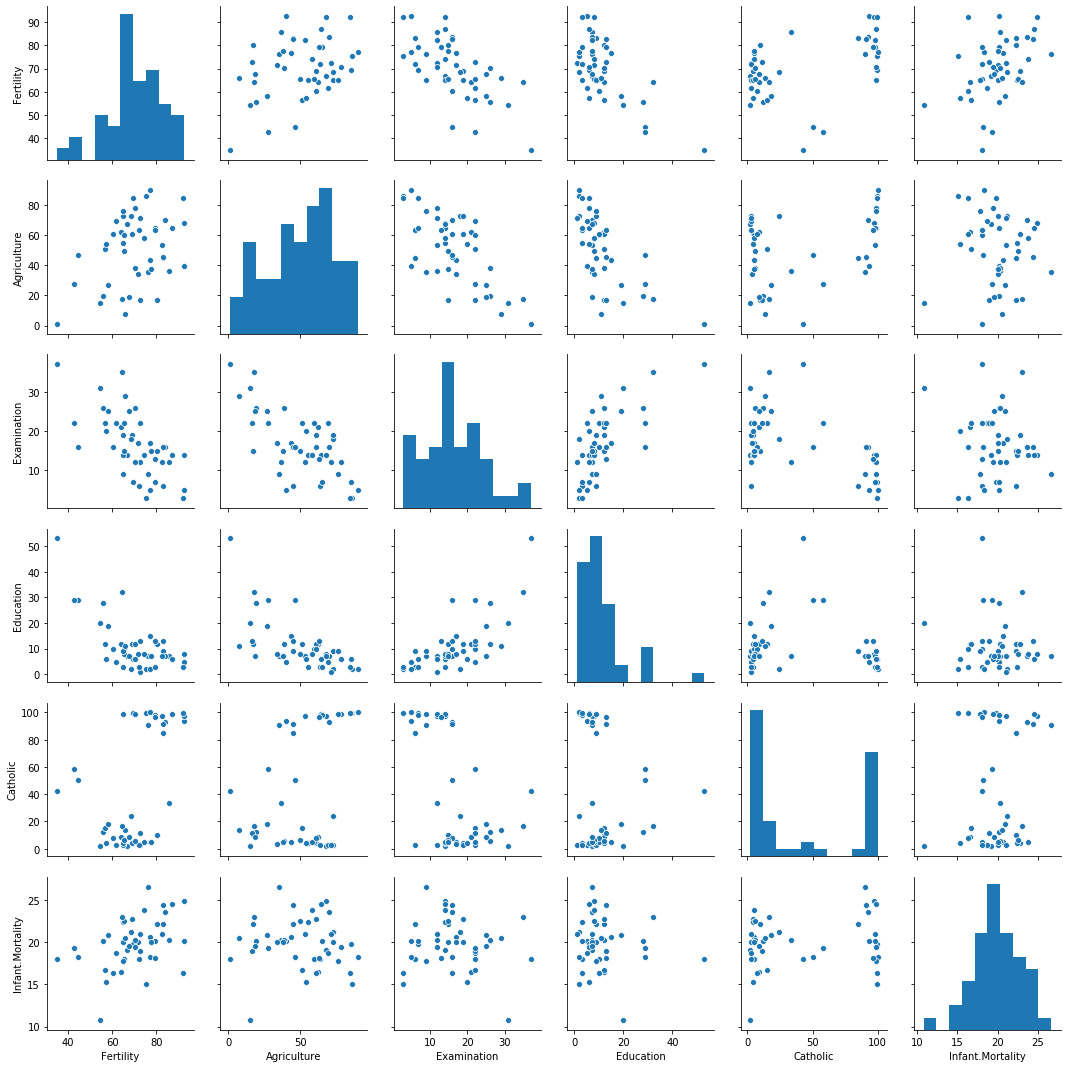

In [23]:
sns.pairplot(swiss)

3. Using the chipotle dataset from the previous exercise, create a bar chart that shows the 4 most popular items and the revenue produced by each.

In [25]:
db_name = "chipotle"
from env import host, user, password
url = f"mysql+pymysql://{user}:{password}@{host}/{db_name}"
    
chipotle_db = pd.read_sql('SELECT * FROM orders', url)

In [26]:
chipotle_db.sample(10)

,id,order_id,quantity,item_name,choice_description,item_price
551,552,230,1,Chicken Burrito,[Tomatillo Red Chili Salsa],$8.75
2008,2009,810,1,Steak Burrito,"[[Fresh Tomato Salsa (Mild), Roasted Chili Corn Salsa (Medium)], [Rice, Guacamole, Let...",$11.48
4131,4132,1654,1,Chips and Tomatillo Red Chili Salsa,nan,$2.95
3531,3532,1419,1,Chips and Guacamole,nan,$3.89
1246,1247,508,1,Steak Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese]]",$8.99
1408,1409,573,1,Bottled Water,nan,$1.50
3950,3951,1584,1,Steak Crispy Tacos,"[Fresh Tomato Salsa, [Sour Cream, Lettuce, Rice, Cheese]]",$9.25
401,402,174,1,Canned Soft Drink,[Sprite],$1.25
170,171,76,1,Chicken Burrito,"[[Tomatillo-Red Chili Salsa (Hot), Fresh Tomato Salsa (Mild)], [Rice, Black Beans, Che...",$8.49
3730,3731,1490,1,Chicken Salad,"[Fresh Tomato Salsa (Mild), Black Beans]",$8.49


In [78]:
top_4 = chipotle_db.groupby("item_name").agg({"item_price_cleaned": "sum", "quantity": "count"}).sort_values(by="quantity", ascending = False)[0:4]

In [79]:
top_4

,item_price_cleaned,quantity
item_name,,
Chicken Bowl,7342.73,726
Chicken Burrito,5575.82,553
Chips and Guacamole,2201.04,479
Steak Burrito,3851.43,368


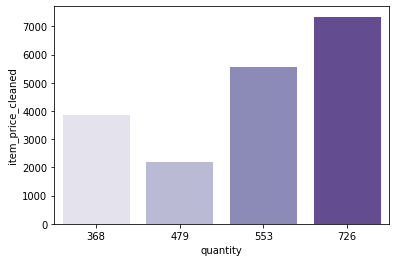

In [81]:
sns.barplot(data=top_4, y='item_price_cleaned', x='quantity', ci=None, palette=palette1)

5. Load the sleepstudy data and read it's documentation. Use seaborn to create a line chart of all the individual subject's reaction times and a more prominant line showing the average change in reaction time.

In [82]:
sleepstudy = data('sleepstudy')

In [88]:
data("sleepstudy", show_doc = True)

sleepstudy

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Reaction times in a sleep deprivation study

### Description

The average reaction time per day for subjects in a sleep deprivation study.
On day 0 the subjects had their normal amount of sleep. Starting that night
they were restricted to 3 hours of sleep per night. The observations represent
the average reaction time on a series of tests given each day to each subject.

### Format

A data frame with 180 observations on the following 3 variables.

`Reaction`

Average reaction time (ms)

`Days`

Number of days of sleep deprivation

`Subject`

Subject number on which the observation was made.

### Details

These data are from the study described in Belenky et al. (2003), for the
sleep-deprived group and for the first 10 days of the study, up to the
recovery period.

### References

Gregory Belenky, Nancy J. Wesensten, David R. Thorne, Maria L. Thomas, Helen
C. Sing, Daniel P. Redmond, 

In [89]:
sleepstudy.sample(10)

,Reaction,Days,Subject
94,346.1222,3,337
34,285.1330,3,330
113,256.2046,2,350
108,308.1020,7,349
8,290.1486,7,308
53,272.9613,2,332
162,272.4428,1,371
52,242.8118,1,332
20,237.3142,9,309
47,290.0750,6,331


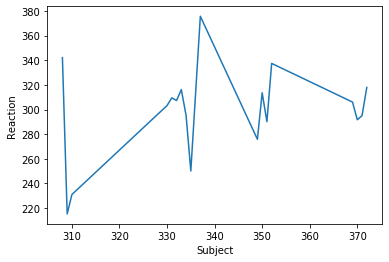

In [93]:
sns.lineplot(data = sleepstudy, x="Subject", y="Reaction", ci=None)

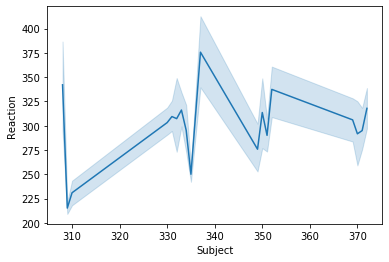

In [94]:
sns.lineplot(data = sleepstudy, x="Subject", y="Reaction")